<a href="https://colab.research.google.com/github/neisserale/semantic-image-search/blob/main/1_Semantic_Image_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil
import random
from tqdm import tqdm

import cv2

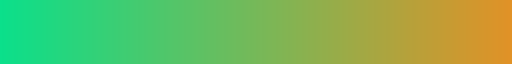

In [ ]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#0BE08B", "#E19227"])
color_cmap = matplotlib.colormaps.get_cmap(cmap)
color_cmap

# Descarga de los datos

In [ ]:
!kaggle datasets download -d ikarus777/best-artworks-of-all-time

Dataset URL: https://www.kaggle.com/datasets/ikarus777/best-artworks-of-all-time
License(s): CC-BY-NC-SA-4.0
100% 2.29G/2.29G [02:16<00:00, 12.4MB/s]
100% 2.29G/2.29G [02:16<00:00, 18.0MB/s]


In [ ]:
!unzip -q best-artworks-of-all-time.zip -d best-artworks-of-all-time

In [ ]:
## delete duplicated
#shutil.rmtree('best-artworks-of-all-time/images/images/Albrecht_DuтХа├кrer')

## Preprocessing

In [ ]:
## create new path
new_path = 'images'
if not os.path.exists(new_path):
    os.makedirs(new_path)

## re-structure the dataset
path = 'best-artworks-of-all-time/images/images'
list_authors = os.listdir(path)
for author in tqdm(list_authors):
    list_img = os.listdir(os.path.join(path, author))

    ## change the name of Durer
    if author == 'Albrecht_Du╠Иrer':
        new_author = 'Albrecht_Durer'

    else:
        new_author = author

    ## create a path for the new author
    os.makedirs(os.path.join(new_path, new_author), exist_ok=True)

    ## move the files to the new path
    for f in list_img:
        ## define the path without changes
        file_path = os.path.join(path, author, f)

        ## change the name of file
        if author == 'Albrecht_Du╠Иrer':
            new_file = f.replace('Albrecht_Du╠Иrer', 'Albrecht_Durer')

        else:
            new_file = f

        ## define the new path wiht new author
        new_file_path = os.path.join(new_path, new_author, new_file)
        shutil.copy2(file_path, new_file_path)

100%|██████████| 50/50 [00:08<00:00,  5.74it/s]


In [ ]:
#shutil.rmtree('images')

In [ ]:
#!apt-get install tree
!tree images -L 1

images
├── Albrecht_Durer
├── Alfred_Sisley
├── Amedeo_Modigliani
├── Andrei_Rublev
├── Andy_Warhol
├── Camille_Pissarro
├── Caravaggio
├── Claude_Monet
├── Diego_Rivera
├── Diego_Velazquez
├── Edgar_Degas
├── Edouard_Manet
├── Edvard_Munch
├── El_Greco
├── Eugene_Delacroix
├── Francisco_Goya
├── Frida_Kahlo
├── Georges_Seurat
├── Giotto_di_Bondone
├── Gustave_Courbet
├── Gustav_Klimt
├── Henri_de_Toulouse-Lautrec
├── Henri_Matisse
├── Henri_Rousseau
├── Hieronymus_Bosch
├── Jackson_Pollock
├── Jan_van_Eyck
├── Joan_Miro
├── Kazimir_Malevich
├── Leonardo_da_Vinci
├── Marc_Chagall
├── Michelangelo
├── Mikhail_Vrubel
├── Pablo_Picasso
├── Paul_Cezanne
├── Paul_Gauguin
├── Paul_Klee
├── Peter_Paul_Rubens
├── Pierre-Auguste_Renoir
├── Pieter_Bruegel
├── Piet_Mondrian
├── Raphael
├── Rembrandt
├── Rene_Magritte
├── Salvador_Dali
├── Sandro_Botticelli
├── Titian
├── Vasiliy_Kandinskiy
├── Vincent_van_Gogh
└── William_Turner

50 directories, 0 files


In [ ]:
new_path = 'data'
if not os.path.exists(new_path):
    os.makedirs(new_path)

shutil.copy2('best-artworks-of-all-time/artists.csv', 'data/artists.csv')

'data/artists.csv'

# Lectura de los datos

In [ ]:
df_artist = pd.read_csv('data/artists.csv')
print(df_artist.shape)
df_artist.head()

(50, 8)


id                name        years                         genre  \
0   0   Amedeo Modigliani  1884 - 1920                 Expressionism   
1   1  Vasiliy Kandinskiy  1866 - 1944  Expressionism,Abstractionism   
2   2        Diego Rivera  1886 - 1957       Social Realism,Muralism   
3   3        Claude Monet  1840 - 1926                 Impressionism   
4   4       Rene Magritte  1898 - 1967      Surrealism,Impressionism   

  nationality                                                bio  \
0     Italian  Amedeo Clemente Modigliani (Italian pronunciat...   
1     Russian  Wassily Wassilyevich Kandinsky (Russian: Васи́...   
2     Mexican  Diego María de la Concepción Juan Nepomuceno E...   
3      French  Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...   
4     Belgian  René François Ghislain Magritte (French: [ʁəne...   

                                        wikipedia  paintings  
0  http://en.wikipedia.org/wiki/Amedeo_Modigliani        193  
1  http://en.wikipedia.org/wiki/Wassily_Kandinsky         88  
2       http://en.wikipedia.org/wiki/Diego_Rivera         70  
3       http://en.wikipedia.org/wiki/Claude_Monet         73  
4      http://en.wikipedia.org/wiki/René_Magritte        194

In [ ]:
df_artist.isna().sum()

id             0
name           0
years          0
genre          0
nationality    0
bio            0
wikipedia      0
paintings      0
dtype: int64

# EDA

In [ ]:
df_artist['name'].nunique()

50

In [ ]:
df_artist['nationality'].nunique()

17

In [ ]:
df_artist['paintings'].sum()

8446

['Vincent van Gogh', 'Edgar Degas', 'Pablo Picasso', 'Pierre-Auguste Renoir', 'Albrecht Dürer', 'Paul Gauguin', 'Francisco Goya', 'Rembrandt', 'Alfred Sisley', 'Titian', 'Marc Chagall', 'Rene Magritte', 'Amedeo Modigliani', 'Paul Klee', 'Henri Matisse', 'Andy Warhol', 'Mikhail Vrubel', 'Sandro Botticelli', 'Leonardo da Vinci', 'Peter Paul Rubens', 'Salvador Dali', 'Hieronymus Bosch', 'Pieter Bruegel', 'Diego Velazquez', 'Kazimir Malevich', 'Frida Kahlo']


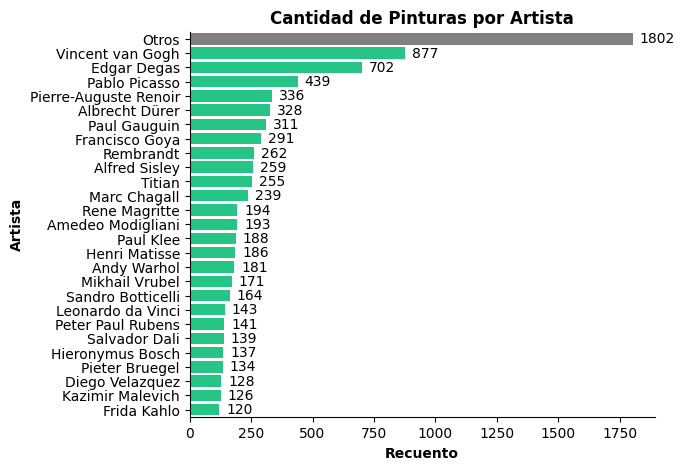

In [ ]:
# @title Pinturas por Artistas

## groupby paintings by authors
df = df_artist.groupby(['name']).agg({'paintings': 'sum'}).reset_index()
df = df.sort_values(by='paintings', ascending=False).reset_index(drop=True)
df.columns = ['name', 'count']

## get 80% of data
df['cum_sum'] = df['count'].cumsum()
df['%'] = df['cum_sum'] / df['count'].sum()
df['new_name'] = df.apply(lambda x: x['name'] if x['%'] <= 0.8 else 'Otros', axis=1)

## get new groupby with others
df = df.groupby(['new_name']).agg({'count': 'sum'}).reset_index()
df = df.sort_values(by='count', ascending=False).reset_index(drop=True)

authors = df[df['new_name'] != 'Otros']['new_name'].to_list()
print(authors)

## plot
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
colors = ['grey' if x=='Otros' else '#0BE08B' for x in df['new_name']]
sns.barplot(data=df, y='new_name', x='count', hue='new_name', palette=colors, ax=ax)

for container in ax.containers:
    ax.bar_label(container, padding=5)

ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel("Recuento", weight="bold")
ax.set_ylabel("Artista", weight="bold")

plt.title('Cantidad de Pinturas por Artista', weight='bold')
plt.show()

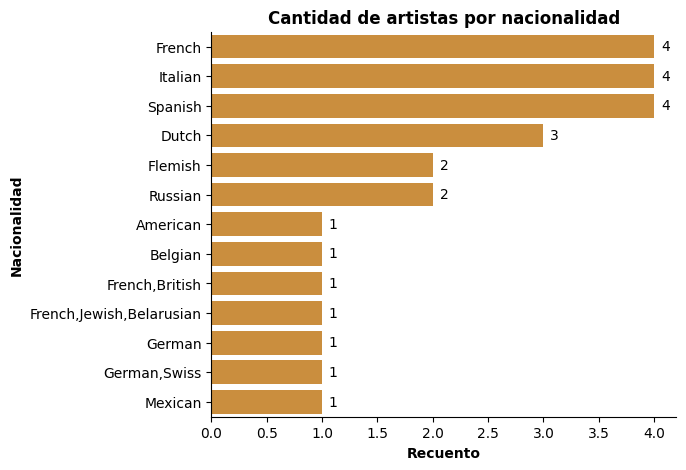

In [ ]:
# @title Artista por Nacionalidad (80%)

df = df_artist[df_artist['name'].isin(authors)].groupby(['nationality']).agg({'name': 'count'}).reset_index()
df = df.sort_values(by='name', ascending=False).reset_index(drop=True)
df.columns = ['nationality', 'count']

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.barplot(data=df, y='nationality', x='count', color='#E19227', ax=ax)

for container in ax.containers:
    ax.bar_label(container, padding=5)

ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel("Recuento", weight="bold")
ax.set_ylabel("Nacionalidad", weight="bold")

plt.title('Cantidad de artistas por nacionalidad', weight='bold')
plt.show()

## SankeyPlot: Artista por Nacionalidad (80%)

In [ ]:
## build sankey estructure
df_sankey = df_artist[df_artist['name'].isin(authors)].groupby(['name', 'nationality']).agg({'name': ['count']}).reset_index()
df_sankey.columns = ['source_label', 'target_label', 'value']
df_sankey.head()

source_label    target_label  value
0     Albrecht Dürer          German      1
1      Alfred Sisley  French,British      1
2  Amedeo Modigliani         Italian      1
3        Andy Warhol        American      1
4    Diego Velazquez         Spanish      1

In [ ]:
def sankey_plot(data, title):
    ## obtención de elementos únicos ordenados por orden de aparición
    unique_source_target = list(pd.unique(data[['source_label', 'target_label']].values.ravel('K')))
    #print(unique_source_target)

    ## asignación de un índice
    mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
    #print(mapping_dict)

    ## conversión del string label al index label
    data['source'] = data['source_label'].map(mapping_dict)
    data['target'] = data['target_label'].map(mapping_dict)
    #print(data)

    ## conversión del dataframe a diccionario
    links_dict = data[["source", "target", "value"]].to_dict(orient='list')
    #print(links_dict)

    ## creación de la lista de colores para nodos y links
    node_colors = ["#E19227"] * 100

    link_colors = []
    for l in links_dict["source"]:
        link_colors.append(node_colors[l])

    #print(unique_source_target)
    #print(node_colors)
    #print(links_dict["source"])
    #print(link_colors)

    ## conversión de string colors to RGBA
    link_colors = ["rgba" + str(matplotlib.colors.to_rgba(c, alpha=0.7)) for c in link_colors]
    #print(link_colors)

    ## creación del Sankey plot
    fig = go.Figure(data=[go.Sankey(
        node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = unique_source_target,
        #color = 'node_colors'
        color = 'grey'
        ),
        link = dict(
        source = links_dict["source"],
        target = links_dict["target"],
        value = links_dict["value"],
        color = link_colors
    ))])

    fig.update_layout(title_text="Sankey Diagram: " + title,
                      font_size=15, font_color="black",
                      width=700, height=600)

    fig.show()

In [ ]:
sankey_plot(df_sankey, "Sankeyplot")

## Muestra de Pinturas

In [ ]:
def plot_sample(author):
    path = 'images/' + author
    list_img = os.listdir(path)
    print('Cantidad de pinturas de {}: {}'.format(author, len(list_img)))

    ## sample paintings
    sample_img = random.sample(list_img, 20)

    ## plot
    fig, axes = plt.subplots(4, 5, figsize=(10, 8))
    i, j = 0, 0
    for f in sample_img:
        img = cv2.imread(os.path.join(path, f))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        #ax = axes[sample_img.index(f) // 5, sample_img.index(f) % 5]
        ax = axes[i, j]
        ax.imshow(img)
        ax.axis('off')

        if j == 4:
            i += 1
            j = 0

        else:
            j += 1

    plt.tight_layout()
    plt.show()

Cantidad de pinturas de Pablo_Picasso: 439


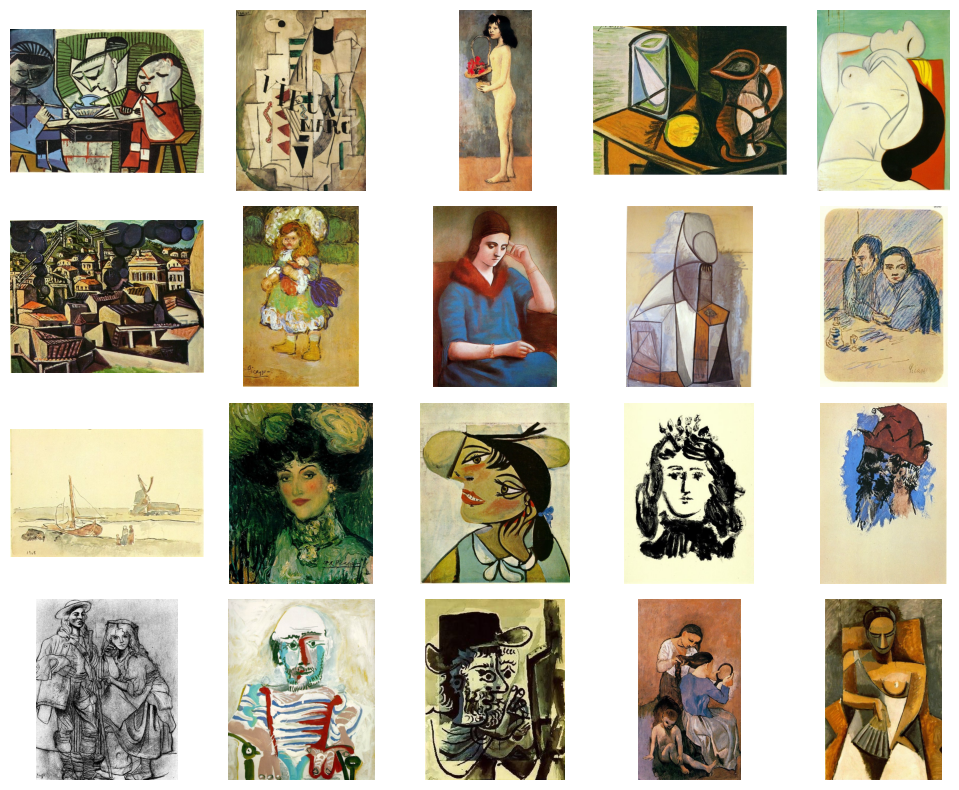

In [ ]:
plot_sample('Pablo_Picasso')

Cantidad de pinturas de Vincent_van_Gogh: 877


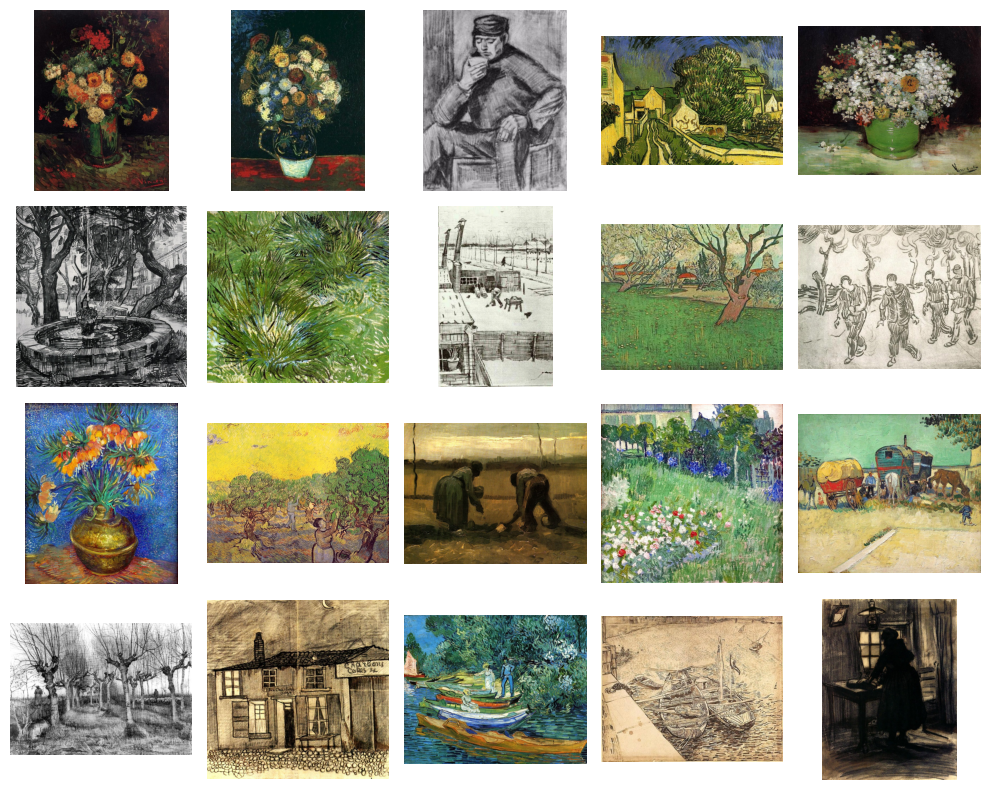

In [ ]:
plot_sample('Vincent_van_Gogh')

Cantidad de pinturas de Leonardo_da_Vinci: 143


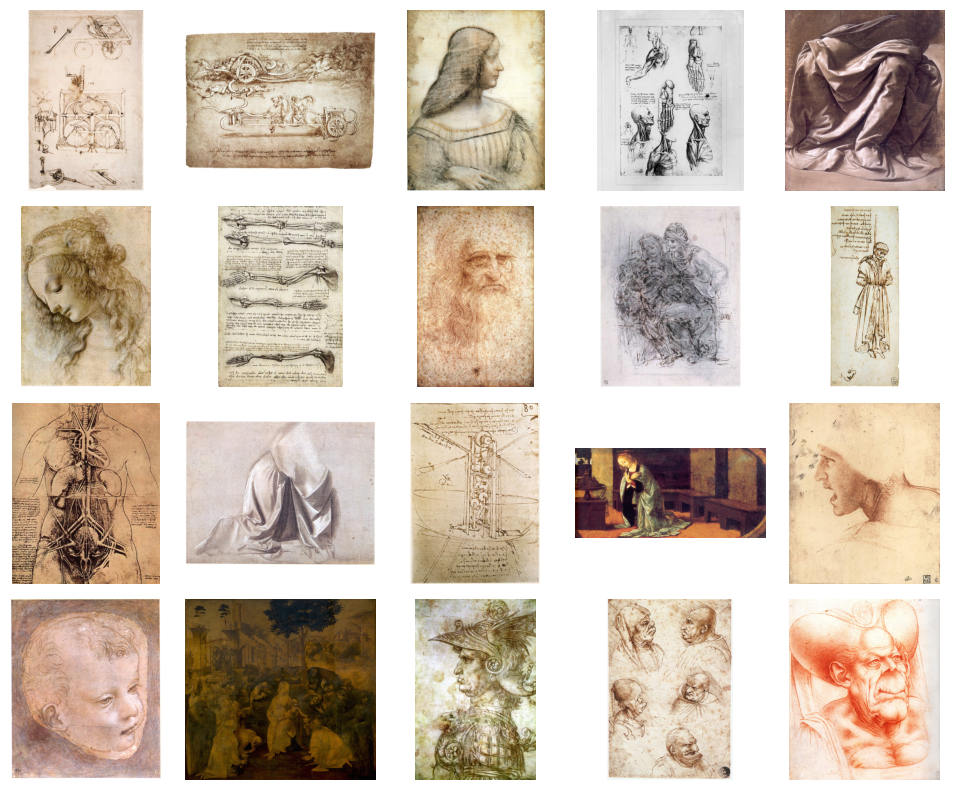

In [ ]:
plot_sample('Leonardo_da_Vinci')

# Semantic Image Search

In [ ]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 23.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil
import random
from tqdm import tqdm

import cv2

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image

import json
import pickle

from sklearn.neighbors import NearestNeighbors
import faiss

In [ ]:
import sklearn
pd.__version__, np.__version__, sklearn.__version__, pickle.format_version, cv2.__version__

('2.1.4', '1.26.4', '1.3.2', '4.0', '4.10.0')

In [ ]:
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, None, None,     │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, None, None,     │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │ 256)                   │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

## Feature Extractor

In [ ]:
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224)) ## PIL.Image.Image image mode=RGB size=224x224
    img = image.img_to_array(img) ## (224, 224, 3)
    img = np.expand_dims(img, axis=0) ## (1, 224, 224, 3)
    img = preprocess_input(img) ## (1, 224, 224, 3)
    features = model.predict(img, verbose=0) ## (1, 2048)

    return features.flatten()

img_path = 'images/' + 'Pablo_Picasso' + '/' + 'Pablo_Picasso_170.jpg'
extract_features(img_path, model)

array([0.16570899, 1.1761618 , 0.22185124, ..., 0.11608869, 0.33920783,
       0.14542694], dtype=float32)

## Construcción del Dataset de Vectores

In [ ]:
path = 'images/'
list_authors = os.listdir(path)

## navigate paintings by authors
data = []
i = 1
for author in list_authors:
    list_img = os.listdir(os.path.join(path, author))

    for f in tqdm(list_img, desc=str(i) + ') ' + author):
        ## get the path of the painting
        img_path = os.path.join(path, author, f)

        ## get the feature
        features = extract_features(img_path, model)

        ## append data
        data.append({'author':author,
                     'img_path':img_path,
                     'features':features})

    i += 1

50) Paul_Klee: 100%|██████████| 188/188 [00:16<00:00, 11.06it/s]


In [ ]:
new_path = 'models'
if not os.path.exists(new_path):
    os.makedirs(new_path)

## save the dictionary
with open('models/features_resnet.pkl', 'wb') as f:
    pickle.dump(data, f)

In [ ]:
## load the dictionary
with open('models/features_resnet.pkl', 'rb') as f:
    features_resnet = pickle.load(f)

## show 5 elements
features_resnet[0:5]

[{'author': 'Michelangelo',
  'img_path': 'images/Michelangelo/Michelangelo_31.jpg',
  'features': array([0.06841877, 1.1764433 , 0.07980758, ..., 0.07412346, 0.        ,
         0.01665201], dtype=float32)},
 {'author': 'Michelangelo',
  'img_path': 'images/Michelangelo/Michelangelo_23.jpg',
  'features': array([0.21683976, 0.97191983, 0.4037761 , ..., 0.17176682, 2.9138749 ,
         0.22032262], dtype=float32)},
 {'author': 'Michelangelo',
  'img_path': 'images/Michelangelo/Michelangelo_36.jpg',
  'features': array([0.01307899, 0.61768866, 0.02937607, ..., 0.01739236, 0.17134875,
         0.06530334], dtype=float32)},
 {'author': 'Michelangelo',
  'img_path': 'images/Michelangelo/Michelangelo_17.jpg',
  'features': array([0.32377616, 2.1673126 , 0.25292984, ..., 0.07200152, 0.87896305,
         0.51086134], dtype=float32)},
 {'author': 'Michelangelo',
  'img_path': 'images/Michelangelo/Michelangelo_6.jpg',
  'features': array([1.7124534 , 0.39220405, 1.6053407 , ..., 0.19950889, 0.

In [ ]:
df_features = pd.DataFrame(features_resnet)
print(df_features.shape)
df_features

(8446, 3)


author                                 img_path  \
0     Michelangelo  images/Michelangelo/Michelangelo_31.jpg   
1     Michelangelo  images/Michelangelo/Michelangelo_23.jpg   
2     Michelangelo  images/Michelangelo/Michelangelo_36.jpg   
3     Michelangelo  images/Michelangelo/Michelangelo_17.jpg   
4     Michelangelo   images/Michelangelo/Michelangelo_6.jpg   
...            ...                                      ...   
8441     Paul_Klee        images/Paul_Klee/Paul_Klee_16.jpg   
8442     Paul_Klee        images/Paul_Klee/Paul_Klee_57.jpg   
8443     Paul_Klee       images/Paul_Klee/Paul_Klee_167.jpg   
8444     Paul_Klee       images/Paul_Klee/Paul_Klee_111.jpg   
8445     Paul_Klee         images/Paul_Klee/Paul_Klee_1.jpg   

                                               features  
0     [0.06841877, 1.1764433, 0.07980758, 0.04986756...  
1     [0.21683976, 0.97191983, 0.4037761, 0.3781312,...  
2     [0.013078988, 0.61768866, 0.02937607, 0.102138...  
3     [0.32377616, 2.1673126, 0.25292984, 0.12295174...  
4     [1.7124534, 0.39220405, 1.6053407, 0.04920389,...  
...                                                 ...  
8441  [0.23549353, 1.324207, 0.015088071, 0.0, 0.005...  
8442  [0.0823016, 1.0593572, 0.03882029, 0.10611603,...  
8443  [1.1952614, 3.8464904, 0.008622422, 0.56223935...  
8444  [0.3489782, 1.6952019, 0.092193395, 1.1816, 0....  
8445  [0.062824816, 0.17116398, 0.0, 0.17276481, 0.0...  

[8446 rows x 3 columns]

In [ ]:
df_features.to_csv('data/df_features.csv', index=False)
df_features.to_pickle('data/df_features.pkl')

In [ ]:
df_features = pd.read_pickle('data/df_features.pkl')
print(df_features.shape)
df_features

(8446, 3)


author                                 img_path  \
0     Michelangelo  images/Michelangelo/Michelangelo_31.jpg   
1     Michelangelo  images/Michelangelo/Michelangelo_23.jpg   
2     Michelangelo  images/Michelangelo/Michelangelo_36.jpg   
3     Michelangelo  images/Michelangelo/Michelangelo_17.jpg   
4     Michelangelo   images/Michelangelo/Michelangelo_6.jpg   
...            ...                                      ...   
8441     Paul_Klee        images/Paul_Klee/Paul_Klee_16.jpg   
8442     Paul_Klee        images/Paul_Klee/Paul_Klee_57.jpg   
8443     Paul_Klee       images/Paul_Klee/Paul_Klee_167.jpg   
8444     Paul_Klee       images/Paul_Klee/Paul_Klee_111.jpg   
8445     Paul_Klee         images/Paul_Klee/Paul_Klee_1.jpg   

                                               features  
0     [0.06841877, 1.1764433, 0.07980758, 0.04986756...  
1     [0.21683976, 0.97191983, 0.4037761, 0.3781312,...  
2     [0.013078988, 0.61768866, 0.02937607, 0.102138...  
3     [0.32377616, 2.1673126, 0.25292984, 0.12295174...  
4     [1.7124534, 0.39220405, 1.6053407, 0.04920389,...  
...                                                 ...  
8441  [0.23549353, 1.324207, 0.015088071, 0.0, 0.005...  
8442  [0.0823016, 1.0593572, 0.03882029, 0.10611603,...  
8443  [1.1952614, 3.8464904, 0.008622422, 0.56223935...  
8444  [0.3489782, 1.6952019, 0.092193395, 1.1816, 0....  
8445  [0.062824816, 0.17116398, 0.0, 0.17276481, 0.0...  

[8446 rows x 3 columns]

In [ ]:
df_features.dtypes

author      object
img_path    object
features    object
dtype: object

## Similarity Search

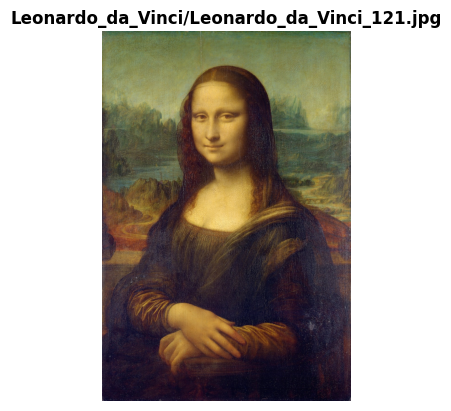

In [ ]:
img_path = 'images/Leonardo_da_Vinci/Leonardo_da_Vinci_121.jpg'

## read image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## plot
plt.imshow(img)
plt.title(file_path, weight='bold')
plt.axis("off")
plt.show()

In [ ]:
test = df_features[df_features['img_path']=='images/Leonardo_da_Vinci/Leonardo_da_Vinci_121.jpg']
test

author                                           img_path  \
5261  Leonardo_da_Vinci  images/Leonardo_da_Vinci/Leonardo_da_Vinci_121...   

                                               features  
5261  [0.095417, 1.9711549, 0.0039118747, 0.17870393...

### Euclidean Distance

In [ ]:
feature_database = np.array(df_features['features'].to_list()).astype('float32')
feature_database

array([[0.06841877, 1.1764433 , 0.07980758, ..., 0.07412346, 0.        ,
        0.01665201],
       [0.21683976, 0.97191983, 0.4037761 , ..., 0.17176682, 2.9138749 ,
        0.22032262],
       [0.01307899, 0.61768866, 0.02937607, ..., 0.01739236, 0.17134875,
        0.06530334],
       ...,
       [1.1952614 , 3.8464904 , 0.00862242, ..., 0.75301653, 0.7720111 ,
        0.6063059 ],
       [0.3489782 , 1.6952019 , 0.09219339, ..., 1.3400502 , 0.1163781 ,
        0.01519482],
       [0.06282482, 0.17116398, 0.        , ..., 0.20377718, 0.09272305,
        0.23624377]], dtype=float32)

In [ ]:
## fit KNN with cosine
knn_model = NearestNeighbors(n_neighbors=10, algorithm='brute', metric='euclidean')
knn_model.fit(feature_database)

## save the model
with open('models/knn_model_euclidean.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

In [ ]:
## load the model
with open('models/knn_model_euclidean.pkl', 'rb') as f:
    knn_model = pickle.load(f)

knn_model

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=10)

In [ ]:
## search 10 neighbors
%%time
query = np.array(test['features'].to_list()).astype('float32')
distances, indices = knn_model.kneighbors(query)
distances, indices

CPU times: user 49.6 ms, sys: 33 µs, total: 49.7 ms
Wall time: 49.6 ms


(array([[ 0.        , 27.59404529, 28.44780784, 28.62177268, 29.23044656,
         29.56797898, 29.57395845, 29.61744098, 29.79469238, 29.88646628]]),
 array([[5261, 2258, 4769, 2461, 4748, 4901, 4767, 4715, 7175, 2425]]))

In [ ]:
similarities = []
for i, d in zip(indices[0], distances[0]):
    ## get the path_file according the index
    img_path = df_features.loc[i, 'img_path']
    similarities.append([img_path, round(d, 4)])

similarities

[['images/Leonardo_da_Vinci/Leonardo_da_Vinci_121.jpg', 0.0],
 ['images/Titian/Titian_60.jpg', 27.594],
 ['images/Rembrandt/Rembrandt_156.jpg', 28.4478],
 ['images/Titian/Titian_179.jpg', 28.6218],
 ['images/Rembrandt/Rembrandt_235.jpg', 29.2304],
 ['images/Francisco_Goya/Francisco_Goya_280.jpg', 29.568],
 ['images/Rembrandt/Rembrandt_55.jpg', 29.574],
 ['images/Rembrandt/Rembrandt_57.jpg', 29.6174],
 ['images/Eugene_Delacroix/Eugene_Delacroix_23.jpg', 29.7947],
 ['images/Titian/Titian_73.jpg', 29.8865]]

In [ ]:
def plot_topn(similarities):
    ## plot
    fig, axes = plt.subplots(2, 5, figsize=(15, 5))
    i, j = 0, 0
    for f, d in similarities:
        ## read image
        img = cv2.imread(f)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        ## plot axes
        ax = axes[i, j]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f.split('/')[-1] + '\n({})'.format(str(d)), weight='bold')

        if j == 4:
            i += 1
            j = 0

        else:
            j += 1

    plt.tight_layout()
    plt.show()

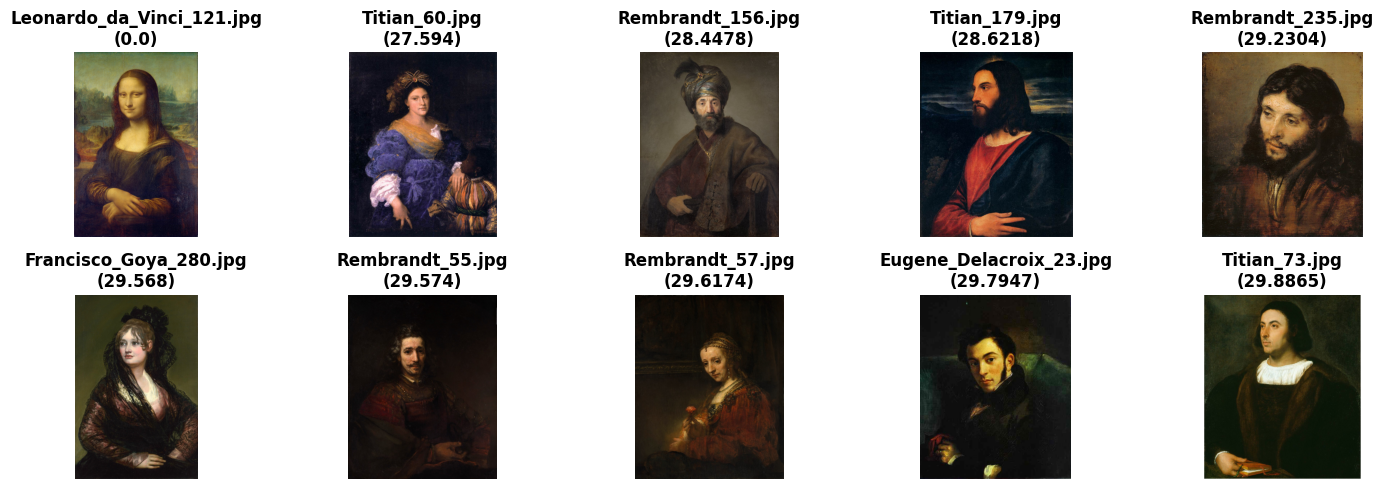

In [ ]:
plot_topn(similarities)

### FAISS (Facebook AI Similarity Search)

In [ ]:
feature_database.shape

(8446, 2048)

In [ ]:
## create FAISS index (IndexFlatL2  --> Euclidean)
index = faiss.IndexFlatL2(feature_database.shape[1])

## fit the index
index.add(feature_database)

## save the index FAISS
faiss.write_index(index, "models/index_faiss_euclidean.index")

In [ ]:
## read the index FAISS
index = faiss.read_index("models/index_faiss_euclidean.index")
index

<faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7d571c38a790> >

In [ ]:
## search 10 neighbors
%%time
k = 10
query = np.array(test['features'].to_list()).astype('float32')
distances, indices = index.search(query, k)
distances, indices

CPU times: user 9.94 ms, sys: 8 µs, total: 9.95 ms
Wall time: 8.7 ms


(array([[  0.     , 761.43134, 809.2777 , 819.20593, 854.4192 , 874.2655 ,
         874.619  , 877.19275, 887.7237 , 893.2008 ]], dtype=float32),
 array([[5261, 2258, 4769, 2461, 4748, 4901, 4767, 4715, 7175, 2425]]))

In [ ]:
similarities_faiss = []
for i, d in zip(indices[0], distances[0]):
    ## get the path_file according the index
    img_path = df_features.loc[i, 'img_path']
    similarities_faiss.append([img_path, round(np.sqrt(d), 4)])

similarities_faiss

[['images/Leonardo_da_Vinci/Leonardo_da_Vinci_121.jpg', 0.0],
 ['images/Titian/Titian_60.jpg', 27.594],
 ['images/Rembrandt/Rembrandt_156.jpg', 28.4478],
 ['images/Titian/Titian_179.jpg', 28.6218],
 ['images/Rembrandt/Rembrandt_235.jpg', 29.2304],
 ['images/Francisco_Goya/Francisco_Goya_280.jpg', 29.568],
 ['images/Rembrandt/Rembrandt_55.jpg', 29.574],
 ['images/Rembrandt/Rembrandt_57.jpg', 29.6174],
 ['images/Eugene_Delacroix/Eugene_Delacroix_23.jpg', 29.7947],
 ['images/Titian/Titian_73.jpg', 29.8865]]

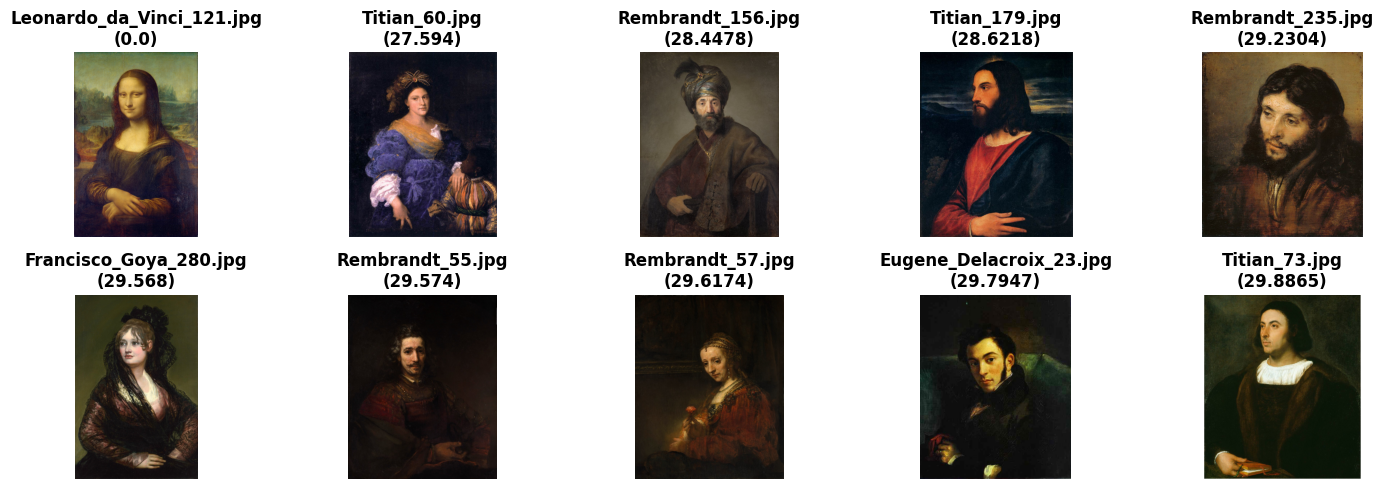

In [ ]:
plot_topn(similarities_faiss)